**Script 1- Preprocessing**

**Import Drive** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
funny_file = "/content/drive/My Drive/Data/Yelp_Review/Raw_Data/funny.txt"
nfunny_file = "/content/drive/My Drive/Data/Yelp_Review/Raw_Data/nfunny_small.txt"

**Import Modules**

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

**Data Collection**

Variables

In [ ]:
funny = []
nfunny = []
nfunny_small = []

Sentence Extraction

In [ ]:
with open(funny_file, 'rb') as file:
    funny = pickle.load(file)

In [ ]:
print(len(funny))

46485


In [ ]:
with open(nfunny_file, 'rb') as file:
    nfunny_small = pickle.load(file)

In [ ]:
print(len(nfunny_small))

46485


**Word Processing**

In [ ]:
contractions = { 
"n't": "not",
"'ve": "have",
"'cause": "because",
"'ll": "will",
"'re":"are",
"'m":"am"
}
contractions_list = ["n't", "'ve", "'cause", "'ll", "'re","'m"]

In [ ]:
def tokenise(text):
    token = [i.replace('\n' , ' ') for i in sent_tokenize(text)]
    words = [word_tokenize(x.strip()) for x in token]
    word = []
    for s in words:
        if len(s) > 0:
            word.append(i.lower().split() for i in s)
    l = []
    for i in words:
        for j in i:
            if j in contractions_list:
                j = contractions[j]
                l.append(j)
                continue
            l.append(j.lower().strip())
    return l

In [ ]:
def All_token(data):
    sentences = []
    for i in data:
        tokens = tokenise(i)
        sentences.append(tokens)
    return sentences

In [ ]:
def RemoveStopWords(tokens):
    stop_words = set(stopwords.words('english')) 
    
    filtered_sentence = [] 
    for lis in tokens:
        w_lis = []
        for w in lis: 
            if w not in stop_words: 
                w_lis.append(w)
        filtered_sentence.append(w_lis)      
    return filtered_sentence

In [ ]:
def CreateSentence(word_list):
    data = []
    for i in range(len(word_list)):
        every_word_list = word_list[i]
        sentence = ' '.join(word for word in every_word_list)
        data.append(sentence)
    return data

Funny Data

In [ ]:
f_tokens = All_token(funny)
print(len(f_tokens))

46485


In [ ]:
filter_f_token = RemoveStopWords(f_tokens)
print(len(filter_f_token))

46485


In [ ]:
funny_data = CreateSentence(filter_f_token)
print(len(funny_data))

46485


In [ ]:
with open('/content/drive/My Drive/Data/Yelp_Review/Model_Input/funny_data.txt', 'wb') as fp:
    pickle.dump(funny_data, fp)

*Funny Example*

In [ ]:
print(funny[1])

Review #189 - 2016

We arrived at Hertz at around 2:15 PM on Aug. 24th and was able to get our rental in about 20-25 minutes.  The pick up process is pretty simple.  You can either go to a customer service rep or use their self-serve kiosk, which is what I ended up doing.

The lady who was assisting me on the kiosk phone was pretty friendly, but she was doing a lot of up-sell so it was kind of bothersome.  I didn't need a bigger car than an economy size since there was only 2 of us.  I understand that they probably work off of commission, but sometimes it's unnecessary to try and convince you to get something that you don't need.

The return process was pretty quick and easy as well.  I ended up getting charged for an extra day because I brought the car back 1.5 hours after the pick up time since my flight didn't leave until 8 PM.  Too bad they don't have a "grace" period for regular customers.

Other than that the car was fine.  I didn't get anything fancy, just a KIA so nothing much 

In [ ]:
print(len(f_tokens[1]))

242


In [ ]:
print(f_tokens[1])

['review', '#', '189', '-', '2016', 'we', 'arrived', 'at', 'hertz', 'at', 'around', '2:15', 'pm', 'on', 'aug.', '24th', 'and', 'was', 'able', 'to', 'get', 'our', 'rental', 'in', 'about', '20-25', 'minutes', '.', 'the', 'pick', 'up', 'process', 'is', 'pretty', 'simple', '.', 'you', 'can', 'either', 'go', 'to', 'a', 'customer', 'service', 'rep', 'or', 'use', 'their', 'self-serve', 'kiosk', ',', 'which', 'is', 'what', 'i', 'ended', 'up', 'doing', '.', 'the', 'lady', 'who', 'was', 'assisting', 'me', 'on', 'the', 'kiosk', 'phone', 'was', 'pretty', 'friendly', ',', 'but', 'she', 'was', 'doing', 'a', 'lot', 'of', 'up-sell', 'so', 'it', 'was', 'kind', 'of', 'bothersome', '.', 'i', 'did', 'not', 'need', 'a', 'bigger', 'car', 'than', 'an', 'economy', 'size', 'since', 'there', 'was', 'only', '2', 'of', 'us', '.', 'i', 'understand', 'that', 'they', 'probably', 'work', 'off', 'of', 'commission', ',', 'but', 'sometimes', 'it', "'s", 'unnecessary', 'to', 'try', 'and', 'convince', 'you', 'to', 'get', 

In [ ]:
print(len(filter_f_token[1]))

123


In [ ]:
print(filter_f_token[1])

['review', '#', '189', '-', '2016', 'arrived', 'hertz', 'around', '2:15', 'pm', 'aug.', '24th', 'able', 'get', 'rental', '20-25', 'minutes', '.', 'pick', 'process', 'pretty', 'simple', '.', 'either', 'go', 'customer', 'service', 'rep', 'use', 'self-serve', 'kiosk', ',', 'ended', '.', 'lady', 'assisting', 'kiosk', 'phone', 'pretty', 'friendly', ',', 'lot', 'up-sell', 'kind', 'bothersome', '.', 'need', 'bigger', 'car', 'economy', 'size', 'since', '2', 'us', '.', 'understand', 'probably', 'work', 'commission', ',', 'sometimes', "'s", 'unnecessary', 'try', 'convince', 'get', 'something', 'need', '.', 'return', 'process', 'pretty', 'quick', 'easy', 'well', '.', 'ended', 'getting', 'charged', 'extra', 'day', 'brought', 'car', 'back', '1.5', 'hours', 'pick', 'time', 'since', 'flight', 'leave', '8', 'pm', '.', 'bad', '``', 'grace', "''", 'period', 'regular', 'customers', '.', 'car', 'fine', '.', 'get', 'anything', 'fancy', ',', 'kia', 'nothing', 'much', 'write', '--', 'fact', 'clean', 'smell',

In [ ]:
print(len(set(filter_f_token[1])))

96


In [ ]:
print(set(filter_f_token[1]))

{'2:15', 'kiosk', 'anything', 'review', 'process', 'size', '-', 'hertz', 'nothing', 'pretty', 'return', 'rentals', 'rep', 'back', 'get', 'pick', 'bothersome', 'extra', 'easy', 'customers', 'either', 'unnecessary', 'friendly', 'customer', 'bigger', 'well', 'commission', 'probably', 'convince', 'charged', 'since', 'economy', 'hours', '#', 'period', 'getting', 'kind', "'s", '--', 'go', 'car', 'phone', 'self-serve', 'brought', 'encountered', '189', 'write', 'up-sell', '2016', 'work', 'lot', 'around', 'grace', 'bad', '2', 'need', '``', 'quick', 'clean', 'assisting', 'like', 'aug.', 'leave', '24th', 'day', "''", 'pm', '20-25', 'service', 'fancy', 'smell', 'fact', 'something', 'kia', 'us', 'able', 'lady', 'much', 'ended', 'arrived', '1.5', 'elsewhere', 'time', 'flight', 'minutes', 'try', '8', 'rental', 'use', 'regular', ',', 'simple', 'sometimes', 'fine', '.', 'understand'}


In [ ]:
print(funny_data[1])

review # 189 - 2016 arrived hertz around 2:15 pm aug. 24th able get rental 20-25 minutes . pick process pretty simple . either go customer service rep use self-serve kiosk , ended . lady assisting kiosk phone pretty friendly , lot up-sell kind bothersome . need bigger car economy size since 2 us . understand probably work commission , sometimes 's unnecessary try convince get something need . return process pretty quick easy well . ended getting charged extra day brought car back 1.5 hours pick time since flight leave 8 pm . bad `` grace '' period regular customers . car fine . get anything fancy , kia nothing much write -- fact clean smell bad like rentals encountered elsewhere .


Non Funny Data

In [ ]:
nf_tokens = All_token(nfunny_small)
print(len(nf_tokens))

46485


In [ ]:
filter_nf_token = RemoveStopWords(nf_tokens)
print(len(filter_nf_token))

46485


In [ ]:
nfunny_data = CreateSentence(filter_nf_token)
print(len(nfunny_data))

46485


In [ ]:
with open('/content/drive/My Drive/Data/Yelp_Review/Model_Input/nfunny_data.txt', 'wb') as fo:
    pickle.dump(nfunny_data, fo)

*Non-Funny Example*

In [ ]:
print(nfunny_small[1])

I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  

Travis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in minutes --- and the scented shampoo room.  Travis has freakishly strong fingers (in a good way) and use the perfect amount of pressure.  That was superb!  Then starts the glorious blowout... where not one, not two, but THREE people were involved in doing the best round-brush action my hair has ever seen.  The team of stylists clearly gets along extremely well, as it's evident from the way they talk to and help one another that it's really genuine and not some corporate requirement.  It was so much 

In [ ]:
print(len(nf_tokens[1]))

310


In [ ]:
print(nf_tokens[1])

['i', '*adore*', 'travis', 'at', 'the', 'hard', 'rock', "'s", 'new', 'kelly', 'cardenas', 'salon', '!', 'i', 'am', 'always', 'a', 'fan', 'of', 'a', 'great', 'blowout', 'and', 'no', 'stranger', 'to', 'the', 'chains', 'that', 'offer', 'this', 'service', ';', 'however', ',', 'travis', 'has', 'taken', 'the', 'flawless', 'blowout', 'to', 'a', 'whole', 'new', 'level', '!', 'travis', "'s", 'greets', 'you', 'with', 'his', 'perfectly', 'green', 'swoosh', 'in', 'his', 'otherwise', 'perfectly', 'styled', 'black', 'hair', 'and', 'a', 'vegas-worthy', 'rockstar', 'outfit', '.', 'next', 'comes', 'the', 'most', 'relaxing', 'and', 'incredible', 'shampoo', '--', 'where', 'you', 'get', 'a', 'full', 'head', 'message', 'that', 'could', 'cure', 'even', 'the', 'very', 'worst', 'migraine', 'in', 'minutes', '--', '-', 'and', 'the', 'scented', 'shampoo', 'room', '.', 'travis', 'has', 'freakishly', 'strong', 'fingers', '(', 'in', 'a', 'good', 'way', ')', 'and', 'use', 'the', 'perfect', 'amount', 'of', 'pressure'

In [ ]:
print(len(filter_nf_token[1]))

188


In [ ]:
print(filter_nf_token[1])

['*adore*', 'travis', 'hard', 'rock', "'s", 'new', 'kelly', 'cardenas', 'salon', '!', 'always', 'fan', 'great', 'blowout', 'stranger', 'chains', 'offer', 'service', ';', 'however', ',', 'travis', 'taken', 'flawless', 'blowout', 'whole', 'new', 'level', '!', 'travis', "'s", 'greets', 'perfectly', 'green', 'swoosh', 'otherwise', 'perfectly', 'styled', 'black', 'hair', 'vegas-worthy', 'rockstar', 'outfit', '.', 'next', 'comes', 'relaxing', 'incredible', 'shampoo', '--', 'get', 'full', 'head', 'message', 'could', 'cure', 'even', 'worst', 'migraine', 'minutes', '--', '-', 'scented', 'shampoo', 'room', '.', 'travis', 'freakishly', 'strong', 'fingers', '(', 'good', 'way', ')', 'use', 'perfect', 'amount', 'pressure', '.', 'superb', '!', 'starts', 'glorious', 'blowout', '...', 'one', ',', 'two', ',', 'three', 'people', 'involved', 'best', 'round-brush', 'action', 'hair', 'ever', 'seen', '.', 'team', 'stylists', 'clearly', 'gets', 'along', 'extremely', 'well', ',', "'s", 'evident', 'way', 'talk'

In [ ]:
print(len(set(filter_nf_token[1])))

142


In [ ]:
print(set(filter_nf_token[1]))

{'lasted', 'best', 'fun', 'shampoo', '-', 'flat', 'clearly', 'fingers', 'freakishly', 'every', 'requirement', 'way', 'looked', 'vegas-worthy', 'also', 'get', 'message', 'girl', 'genuine', 'great', 'relaxing', 'admirable', 'even', 'stranger', ';', 'scented', 'making', 'bouncey', 'stylists', 'flipped', 'days', '!', 'chains', 'wrist', '...', 'over-doing', 'happen', 'worst', 'team', 'along', 'texas', 'perfectly', 'flawless', 'well', 'room', 'single', 'seen', 'corporate', 'worth', 'involved', 'thing', 'volume', 'skilled', 'glorious', 'without', 'terrific', 'see', "'s", '--', 'look', 'comes', 'iron', 'three', 'black', 'level', 'round-brush', 'next', ')', 'starts', 'incredible', 'kelly', 'outfit', 'make', 'could', '&', 'taken', 'salon', 'new', 'style', '(', 'around', 'gets', 'feel', 'noting', 'people', 'talk', 'extremely', 'however', 'cure', 'head', 'less', 'superb', 'full', 'fan', 'like', 'hard', 'better', 'one', 'awesome', 'styled', 'swoosh', 'beauuuutiful', 'service', 'two', 'perfect', 'he

In [ ]:
print(nfunny_data[1])

*adore* travis hard rock 's new kelly cardenas salon ! always fan great blowout stranger chains offer service ; however , travis taken flawless blowout whole new level ! travis 's greets perfectly green swoosh otherwise perfectly styled black hair vegas-worthy rockstar outfit . next comes relaxing incredible shampoo -- get full head message could cure even worst migraine minutes -- - scented shampoo room . travis freakishly strong fingers ( good way ) use perfect amount pressure . superb ! starts glorious blowout ... one , two , three people involved best round-brush action hair ever seen . team stylists clearly gets along extremely well , 's evident way talk help one another 's really genuine corporate requirement . much fun ! next travis started flat iron . way flipped wrist get volume around without over-doing making look like texas pagent girl admirable . 's also worth noting fry hair -- something happen less skilled stylists . end blowout & style hair perfectly bouncey looked terr

**Word 2 Vector Model**

In [ ]:
import gensim   
from sklearn.decomposition import PCA

In [ ]:
final_f_list = filter_f_token + filter_nf_token
print(len(final_f_list))

92970


In [ ]:
num_features = 100    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [ ]:
w2v_model = gensim.models.Word2Vec(final_f_list, workers=num_workers,size=num_features, min_count = min_word_count, window = context, sample = downsampling)

In [ ]:
words = list(w2v_model.wv.vocab)
print(len(words))

12930


In [ ]:
print(words)

['took', 'kids', 'hang', 'one', 'fine', '72', 'degree', 'sunny', 'saturday', 'february', '.', 'going', 'bridge', ',', 'coming', 'casino', 'cant', 'miss', 'nice', 'view', 'waterfall', 'park', 'bad', 'playground', 'things', 'vouch', 'little', 'area', 'decent', 'amount', 'equipment', 'swings', 'slides', 'tables', 'benches', 'like', 'soft', 'material', 'use', 'built', 'also', 'sand', 'lot', 'dinosaur', 'bones', 'props', 'day', 'went', 'packed', 'running', 'actually', 'waiting', 'get', '!', 'decided', 'walk', 'around', 'check', 'rest', 'see', 'ducks', 'everywhere', 'especially', 'pond', 'unfortunately', '``', 'stuff', "''", 'ends', 'paths', 'walking', 'green', 'duck', 'crap', 'brings', 'question', 'kind', 'spray', 'force', 'field', '?', 'anywhere', 'im', 'curious', 'many', 'people', 'would', 'spread', 'blanket', 'picnic', 'grass', 'well', 'review', 'starting', 'grossed', 'thinking', 'carefully', 'trying', 'step', 'car', 'made', 'mental', 'note', 'make', 'sure', 'mention', 'saw', 'hesitate',

In [ ]:
print(w2v_model.similarity('sauce','modern'))

-0.23720919


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(w2v_model['took'])

[ 0.5464815  -0.97241086  3.311198   -3.2550704  -0.99351954 -2.4567058
  1.5414901  -0.37879306 -1.5991054   4.2504387   1.6764148   4.196207
 -0.2918213  -0.5003909  -1.9147344  -2.3170695  -1.6303438  -3.4639513
 -1.6889924  -0.6271415   1.6377608   0.77696633 -0.68309957  4.6379967
 -2.7759957  -1.369109   -0.31374234 -0.9626596  -1.6108712   1.7279468
  3.1372228  -0.44742745  0.4598992   1.162359    0.81430787  3.820609
 -0.62986654 -1.2076048   0.79417926  1.5636802   0.15471247 -1.0993953
  1.4210918   1.1678452   0.23822965 -2.7686596  -2.8209567  -1.2733232
  0.5956113   2.0893734  -1.7294456  -2.9805646   1.5977479   1.4553773
  0.36763456 -1.1247832   0.33200353 -1.589456   -3.631587    3.843615
 -1.4818952   1.7684997  -0.8475198  -0.14820518  1.6243857  -0.664066
  1.5931782  -0.6819762   2.9001343  -1.7201558   1.20333     3.4189372
  4.8365593  -1.0802591  -0.9002712  -0.96076995  1.7882785  -0.7318525
  1.2100542   0.69546425  1.0034025   0.53885883 -1.3905729   1.9564

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(w2v_model['?'])

[-0.5718046  -1.70426    -0.6702491   0.1551818  -0.8504773   0.7040305
  1.9035766   1.1369313  -1.2792156  -1.0334326   2.764656    0.2058975
  0.11546148 -0.31984046  2.8193884   0.6413248   0.3156662   1.4188912
  1.9453793   2.9681072   2.9224453  -0.03779419 -0.38111103 -1.9701613
 -3.0297391   0.28237963 -3.8542516  -0.30939808 -0.5290664  -1.1360329
 -0.49305812  1.270076    3.7576365  -0.23244445 -2.040888   -0.76465636
  1.7159061  -0.47767746 -0.38736698 -1.1959461  -0.14350411  1.1517358
 -1.9146327   0.00571466  3.6020834   0.9100537  -0.16589394 -0.09878445
 -0.38552758 -1.3967462   1.0285149   0.62193024  1.6778002  -2.169111
  0.53992814 -1.3768017  -0.45789173 -0.84260064 -1.6517532  -2.8357732
 -1.8068635  -0.74452204 -1.193735   -1.0914897   1.5114803   0.05578345
 -0.33031112  1.2645391   2.1459153  -1.6985198  -0.89573544 -0.00669429
  2.1844478  -2.600825   -1.5781724  -0.84431607 -0.98498654  1.6746037
  2.5607078  -1.3902587  -0.4401131   5.051314    0.9024498  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
result = w2v_model.most_similar(positive=['queen', 'man'], negative=['king'], topn=1)
print(result)

[('woman', 0.6293600797653198)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Principal Component Analysis or PCA

In [ ]:
Embedding_index = w2v_model[words]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


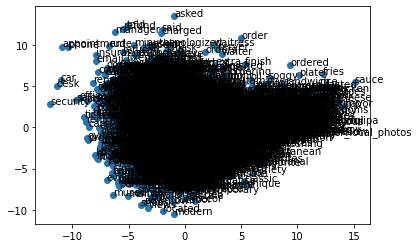

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(Embedding_index)
plt.scatter(result[:, 0], result[:, 1])
words = list(w2v_model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
w2v_model.save("/content/drive/My Drive/Data/Yelp_Review/word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**Script-2 Model Training**

**Model Inputs**

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_gpu_support())

[]
False
True


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
funny_data = []
nfunny_data = []

In [ ]:
with open('/content/drive/My Drive/Data/Yelp_Review/Model_Input/funny_data.txt', 'rb') as file:
    funny_data = pickle.load(file)
print(len(funny_data))

46485


In [ ]:
with open('/content/drive/My Drive/Data/Yelp_Review/Model_Input/nfunny_data.txt', 'rb') as file:
    nfunny_data = pickle.load(file)
print(len(nfunny_data))


46485


**Word2Vec Model**

In [ ]:
import gensim
w2v_model = gensim.models.Word2Vec.load("/content/drive/My Drive/Data/Yelp_Review/word2vec.model")
words = list(w2v_model.wv.vocab)
Embedding_index = w2v_model[words]
print(Embedding_index.shape)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


(12930, 100)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
train_joke= funny_data + nfunny_data
print(len(train_joke))

92970


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_joke)
encoded_joke = tokenizer.texts_to_sequences(train_joke)

In [ ]:
print(len(encoded_joke[1]))
print(encoded_joke[1])
print(train_joke[1])

109
[138, 30263, 2583, 396, 6656, 57, 35, 338, 935, 12858, 12497, 298, 7, 1742, 262, 625, 93, 391, 889, 52, 526, 319, 13, 166, 14, 3779, 209, 1030, 470, 4523, 423, 457, 8252, 4523, 377, 52, 65, 85, 1160, 844, 198, 14321, 106, 1229, 175, 5726, 373, 70, 35, 18, 636, 170, 112, 7047, 597, 1, 3946, 38, 4973, 7, 80, 106, 399, 889, 52, 336, 384, 20, 423, 168, 1049, 304, 53, 370, 175, 12, 92, 30, 241, 391, 9, 70, 989, 353, 346, 935, 104, 4250, 8, 2506, 431, 380, 175, 408, 7, 186, 982, 13067, 162, 27, 866, 363, 150, 938, 104, 2, 8002, 2886, 1255]
review # 189 - 2016 arrived hertz around 2:15 pm aug. 24th able get rental 20-25 minutes . pick process pretty simple . either go customer service rep use self-serve kiosk , ended . lady assisting kiosk phone pretty friendly , lot up-sell kind bothersome . need bigger car economy size since 2 us . understand probably work commission , sometimes 's unnecessary try convince get something need . return process pretty quick easy well . ended getting charge

In [ ]:
max_length = max([len(s.split()) for s in train_joke])
print(max_length)

888


In [ ]:
X = pad_sequences(encoded_joke, maxlen=max_length)
print(len(X))

92970


In [ ]:
Y = np.array([1 for _ in range(46485)] + [0 for _ in range(46485)])
print(len(Y))

92970


In [ ]:
print(train_joke[1])

review # 189 - 2016 arrived hertz around 2:15 pm aug. 24th able get rental 20-25 minutes . pick process pretty simple . either go customer service rep use self-serve kiosk , ended . lady assisting kiosk phone pretty friendly , lot up-sell kind bothersome . need bigger car economy size since 2 us . understand probably work commission , sometimes 's unnecessary try convince get something need . return process pretty quick easy well . ended getting charged extra day brought car back 1.5 hours pick time since flight leave 8 pm . bad `` grace '' period regular customers . car fine . get anything fancy , kia nothing much write -- fact clean smell bad like rentals encountered elsewhere .


In [ ]:
print(X[1])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [ ]:
print(Y[1])

1


**Deep Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_text, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_text.shape, Y_train.shape, Y_test.shape)

(74376, 888) (18594, 888) (74376,) (18594,)


In [ ]:
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, LSTM
from tensorflow.python.keras.layers.embeddings import Embedding
from tensorflow.python.keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
model_joke = Sequential()
model_joke.add(Embedding(Embedding_index.shape[0], Embedding_index.shape[1], weights=[Embedding_index], input_length=max_length, trainable=False))
model_joke.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_joke.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
model_joke.add(MaxPooling1D(pool_size=2))
model_joke.add(Dropout(rate = 0.6))
model_joke.add(Flatten())
model_joke.add(Dense(256, activation='relu'))
model_joke.add(Dense(1, activation='sigmoid'))
model_joke.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 888, 100)          1293000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 881, 32)           25632     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 874, 64)           16448     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 437, 64)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 437, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 27968)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [ ]:
model_joke.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_joke.fit(X_train, Y_train, validation_data=(X_text, Y_test), epochs=5, batch_size=32, verbose=2)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')	
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model_joke.evaluate(X_text, Y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))
print('Test Loss: %f' % (np.exp(loss)))

**Model Scores**

In [ ]:
from sklearn.metrics import accuracy_score, r2_score, f1_score, fbeta_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
Y_pred = model_joke.predict_classes(X_text)
for i in range(20):
	print('Actual = {}:, Predicted = {}'.format(Y_test[i], Y_pred[i]))

In [ ]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy : {}".format(acc))

In [ ]:
error = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error : {}".format(error))

In [ ]:
error = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error : {}".format(error))

In [ ]:
score = r2_score(Y_test, Y_pred)
print("R2 Score : {}".format(score))

In [ ]:
score = precision_score(Y_test, Y_pred, average='macro')
print("Precision Score : {}".format(score))

In [ ]:
score = recall_score(Y_test, Y_pred, average='macro')
print("Recall Score : {}".format(score))

In [ ]:
score = f1_score(Y_test, Y_pred)
print("F1 Score : {}".format(score))

In [ ]:
score = fbeta_score(Y_test, Y_pred, beta = 0.5)
print("F-Beta Score : {}".format(score))

In [ ]:
jokes_roc = roc_auc_score(Y_test, Y_pred)
print('Jokes: ROC-Area Under Curve = {}'.format(jokes_roc))

In [ ]:
J_fpr, J_tpr, _ = roc_curve(Y_test, Y_pred)
plt.plot(J_fpr, J_tpr, color = 'blue', label = 'Jokes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()